### Bài 1: Phân phối độ trễ trung bình của các API

**Mô tả:**  
Phân tích độ trễ (`latency_ms`) của các API như `login`, `search`, `checkout`, `profile` trong hệ thống backend.

**Mục tiêu:**  
Nhận diện API bất ổn, phát hiện phân phối lệch, outlier.

**Biểu đồ gợi ý:**  
`boxplot`

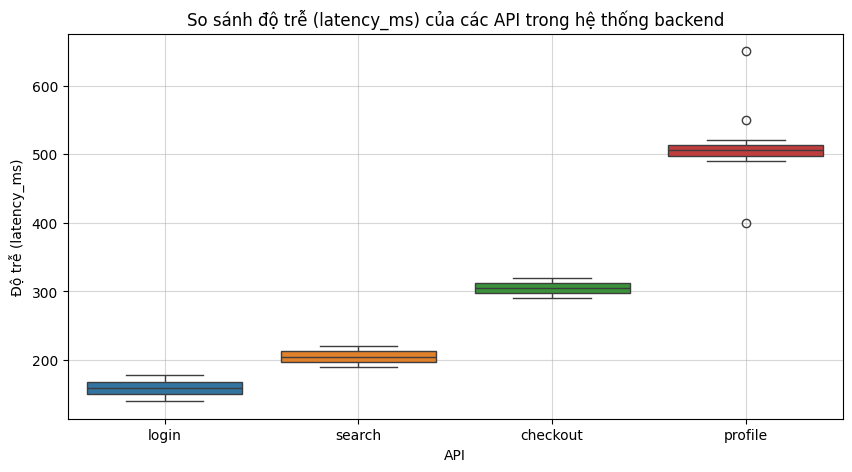

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_1_api_latency.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.boxplot(x='api', y='latency_ms', hue='api', data=df, showfliers=True)
plt.title("So sánh độ trễ (latency_ms) của các API trong hệ thống backend")
plt.xlabel("API")
plt.ylabel("Độ trễ (latency_ms)")
plt.grid(True, alpha=0.5)
plt.show()

### Bài 2: So sánh số lượng request theo giờ trong tuần

**Mô tả:**  
Tổng hợp và trực quan hóa số lượng request hệ thống nhận được theo từng giờ (0–23) và ngày (Thứ 2 → Chủ nhật).

**Mục tiêu:**  
Nhận diện giờ cao điểm, tối ưu phân bổ tải hệ thống.

**Biểu đồ gợi ý:**  
`heatmap`

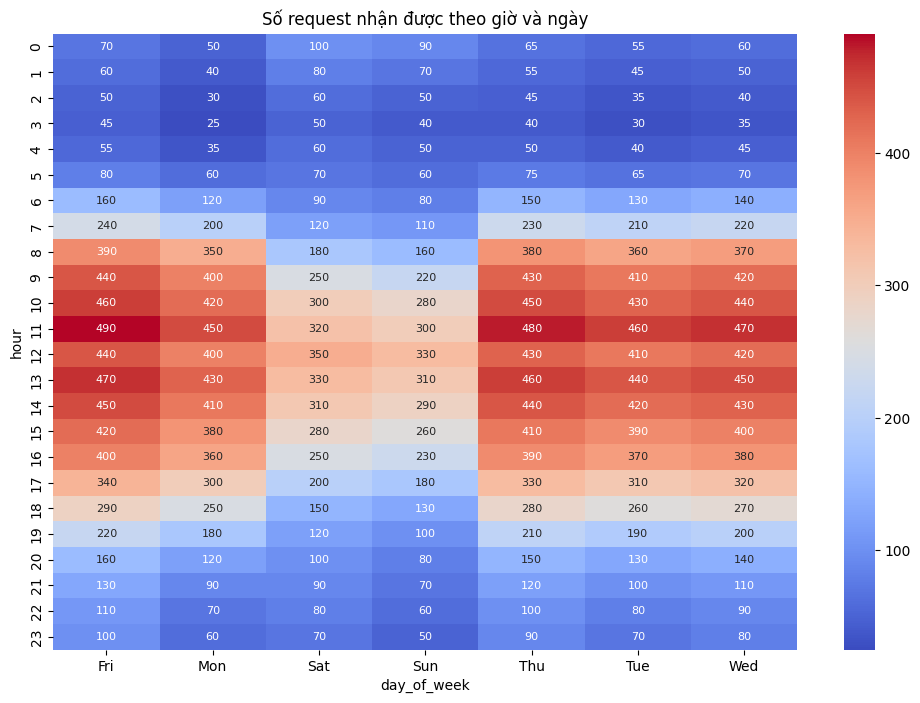

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_2_request_by_hour.csv")

pivot_df = df.pivot_table(index='hour', columns='day_of_week', values='request_count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap='coolwarm', fmt='.0f', annot_kws={"size": 8}) # fmt='.0f' định dạng giá trị 'request_count' là float với 0 chữ số thập phân
plt.title("Số request nhận được theo giờ và ngày")

plt.show()

### Bài 3: Mối quan hệ giữa kích thước file và thời gian load lên data lake

**Mô tả:**  
Phân tích tương quan giữa `file_size_mb` và `load_time_sec` trong pipeline ingestion.

**Mục tiêu:**  
Kiểm tra hiệu năng, nghi ngờ bottleneck hoặc lỗi hệ thống.

**Biểu đồ gợi ý:**  
`scatterplot`

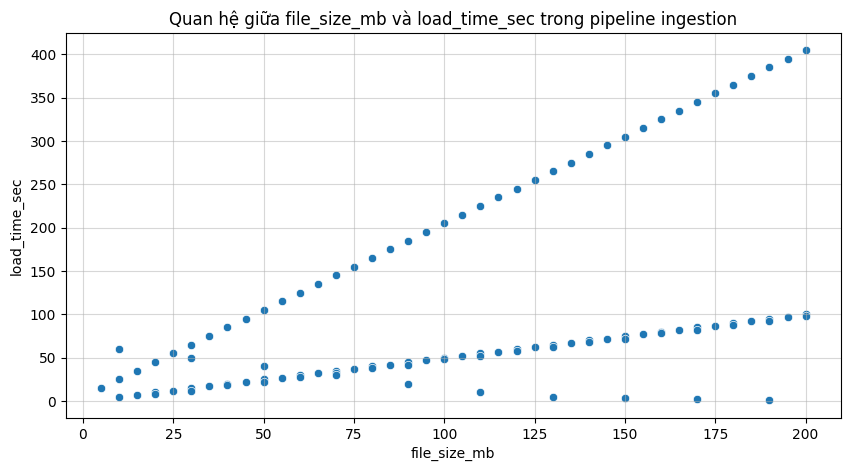

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_3_file_load_time.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.scatterplot(x='file_size_mb', y='load_time_sec', data=df)
plt.title("Quan hệ giữa file_size_mb và load_time_sec trong pipeline ingestion")
plt.xlabel("file_size_mb")
plt.ylabel("load_time_sec")
plt.grid(True, alpha=0.5)
plt.show()

## 1/. Phân tích xu hướng và các điểm đáng chú ý:

### Xu hướng chung:
- Có một xu hướng chung là khi file_size_mb tăng lên, load_time_sec cũng có xu hướng tăng theo. Điều này là hợp lý vì các tệp lớn hơn thường mất nhiều thời gian hơn để xử lý và tải lên.
### Hai cụm dữ liệu clusters -> Xu hướng riêng biệt:
- **Nhóm dưới:** Một nhóm các điểm dữ liệu nằm phía dưới, tạo thành một đường xu hướng tăng chậm hơn. Nghĩa là với cùng một kích thước tệp, thời gian tải ở nhóm này thấp hơn đáng kể.
- **Nhóm trên:** Một nhóm các điểm dữ liệu nằm phía trên, tạo thành một đường xu hướng dốc hơn nhiều. Thời gian tải tăng nhanh hơn nhiều khi kích thước tệp tăng.
### Điểm bất thường (Outliers):
- Có một vài điểm dữ liệu nằm tách biệt hẳn so với hai xu hướng chính, đặc biệt là các điểm có file_size_mb lớn (trên 100MB) nhưng load_time_sec lại rất thấp (gần bằng 0).

## 2/. Diễn giải và Đặt giả thuyết:
**Bạn thấy mối quan hệ tổng thể nào giữa kích thước tệp và thời gian tải? Điều này có hợp lý không? Tại sao?**
- Kích thước tệp tỷ lệ thuận với thời gian tải -> Hợp lý

**Bạn có nhận thấy điều gì đặc biệt về sự phân bố của các điểm dữ liệu không? (Hướng học viên đến việc nhận ra 2 cụm/xu hướng).**
- Các điểm dữ liệu phân bổ thành 2 nhóm, gồm nhóm trên (tải lâu hơn) và nhóm dưới (tải nhanh hơn) với cùng một kích thước tệp.
- Ngoài ra, ở dưới cùng biểu đồ còn có một số các ouliers đặc biệt, mặc dù kích thước tệp lớn nhưng thời gian tải gần bằng 0.
  
**Tại sao lại có hai nhóm điểm khác biệt như vậy? Bạn có thể nghĩ ra những lý do nào có thể giải thích cho sự khác biệt về thời gian tải dù kích thước tệp tương đương hoặc tăng lên?**
- Gợi ý: loại tệp khác nhau, cơ chế xử lý khác nhau, tài nguyên hệ thống khác nhau tại thời điểm tải, lỗi trong quá trình xử lý...
  
**Bạn nghĩ gì về những điểm có kích thước tệp lớn nhưng thời gian tải gần như bằng 0? Liệu đây có phải là dữ liệu lỗi, hay có một lời giải thích kỹ thuật nào khác không?**
- Gợi ý: dữ liệu được cache, quá trình tải bị lỗi và kết thúc sớm, loại tệp đặc biệt chỉ chứa metadata...

### Bài 4: So sánh tần suất lỗi theo loại lỗi

**Mô tả:**  
Tổng hợp số lần xảy ra của từng loại lỗi trong logs (`timeout`, `500`, `auth_failed`, `rate_limit`, ...).

**Mục tiêu:**  
Nhận diện lỗi phổ biến, ưu tiên khắc phục.

**Biểu đồ gợi ý:**  
`countplot`

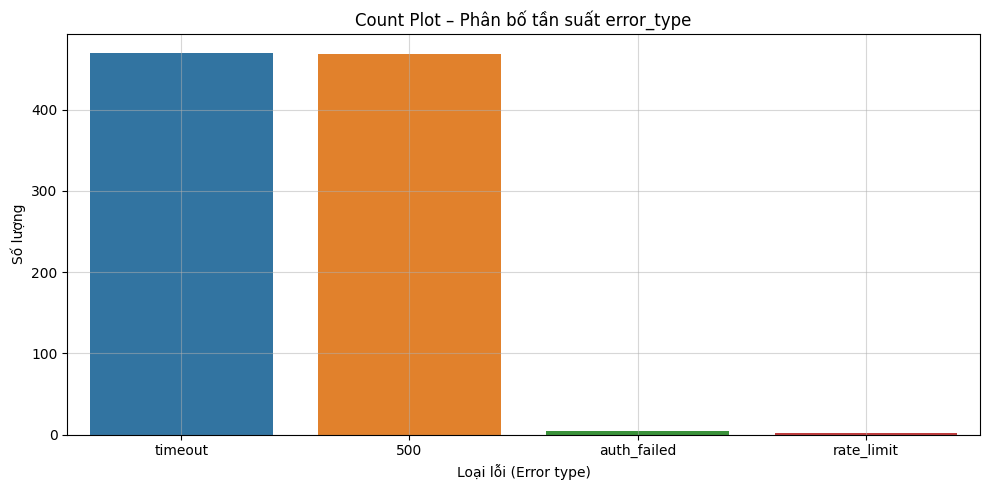

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_4_error_frequency.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.countplot(x='error_type', hue='error_type', data=df)
plt.title("Count Plot – Phân bố tần suất error_type")
plt.xlabel("Loại lỗi (Error type)")
plt.ylabel("Số lượng")
#plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Bài 5: Trung bình thời gian xử lý của từng bước ETL pipeline

**Mô tả:**  
Mỗi pipeline có các bước như `extract`, `transform`, `load`, `validate`. Phân tích `average_duration_sec` theo `step`.

**Mục tiêu:**  
So sánh hiệu suất từng bước, nhận diện bottleneck.

**Biểu đồ gợi ý:**  
`barplot`

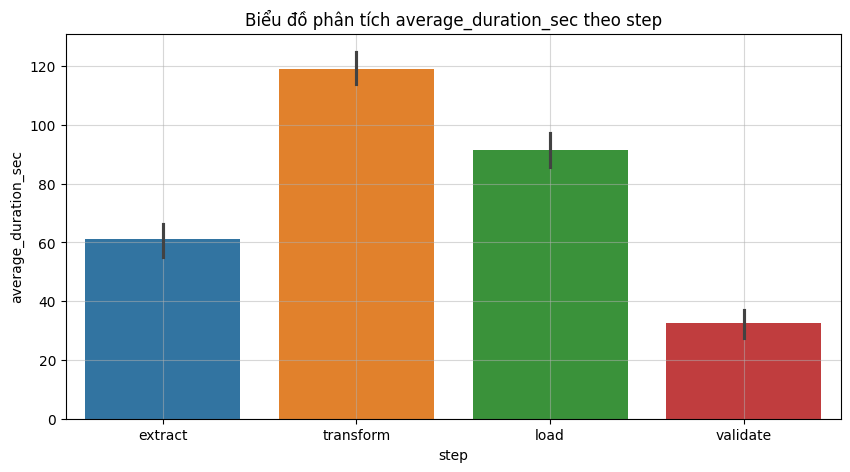

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_5_etl_pipeline_performance.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='step', y='average_duration_sec', hue='step', data=df)
plt.title("Biểu đồ phân tích average_duration_sec theo step")
plt.xlabel("step")
plt.ylabel("average_duration_sec")
#plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()

### Bài 6: So sánh băng thông sử dụng của các service theo tuần

**Mô tả:**  
Mỗi service ghi nhận `bandwidth_gb` theo tuần → so sánh xu hướng theo thời gian.

**Mục tiêu:**  
Theo dõi tăng trưởng băng thông, cảnh báo scaling.

**Biểu đồ gợi ý:**  
`lineplot` (nhiều series)

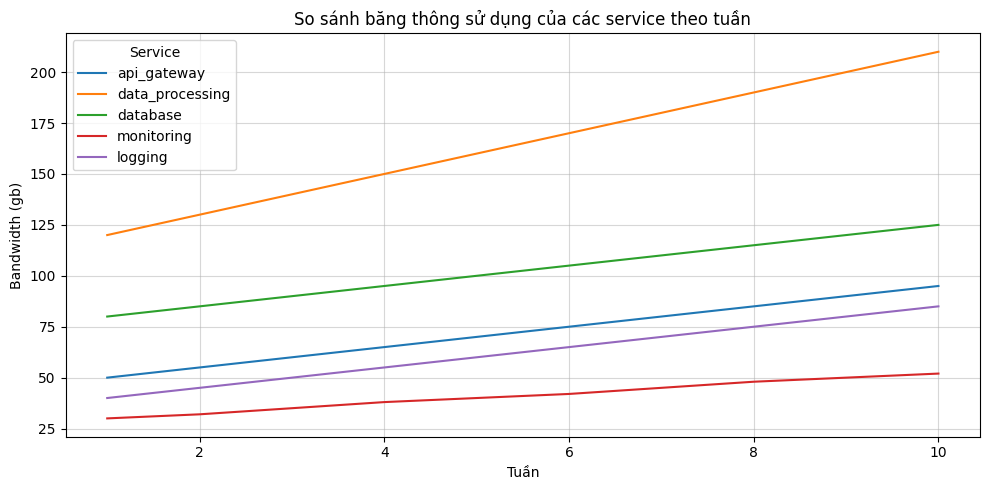

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_6_bandwidth_usage.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.lineplot(x='week', y='bandwidth_gb', hue='service', data=df)
plt.title("So sánh băng thông sử dụng của các service theo tuần")
plt.xlabel("Tuần")
plt.ylabel("Bandwidth (gb)")
plt.legend(title="Service")
#plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

### Bài 7: Phân phối số lượng dòng dữ liệu trong mỗi batch

**Mô tả:**  
Kiểm tra histogram số dòng (`row_count`) của các batch dữ liệu được đẩy vào staging layer.

**Mục tiêu:**  
Phát hiện batch bất thường (quá lớn/quá nhỏ), nghi ngờ lỗi ingest.

**Biểu đồ gợi ý:**  
`histplot`

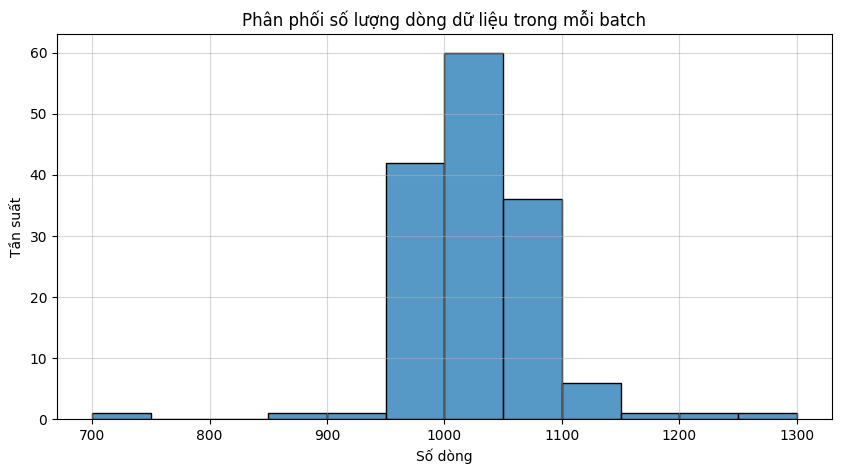

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bai_tap_7_batch_row_count.csv")
df.head(10)

num_bins = int(len(df['row_count'])**0.5)

plt.figure(figsize=(10, 5))
sns.histplot(df['row_count'], bins=num_bins)
plt.title("Phân phối số lượng dòng dữ liệu trong mỗi batch")
plt.xlabel("Số dòng")
plt.ylabel("Tần suất")
plt.grid(True, alpha=0.5)
plt.show()

### Bài 8: So sánh tỷ lệ thành công của job ETL theo thời gian

**Mô tả:**  
Mỗi job có kết quả `success` hoặc `failed` theo ngày. Tính và vẽ tỷ lệ thành công mỗi ngày trong tháng.

**Mục tiêu:**  
Theo dõi độ ổn định của pipeline.

**Biểu đồ gợi ý:**  
`lineplot` hoặc `barplot`

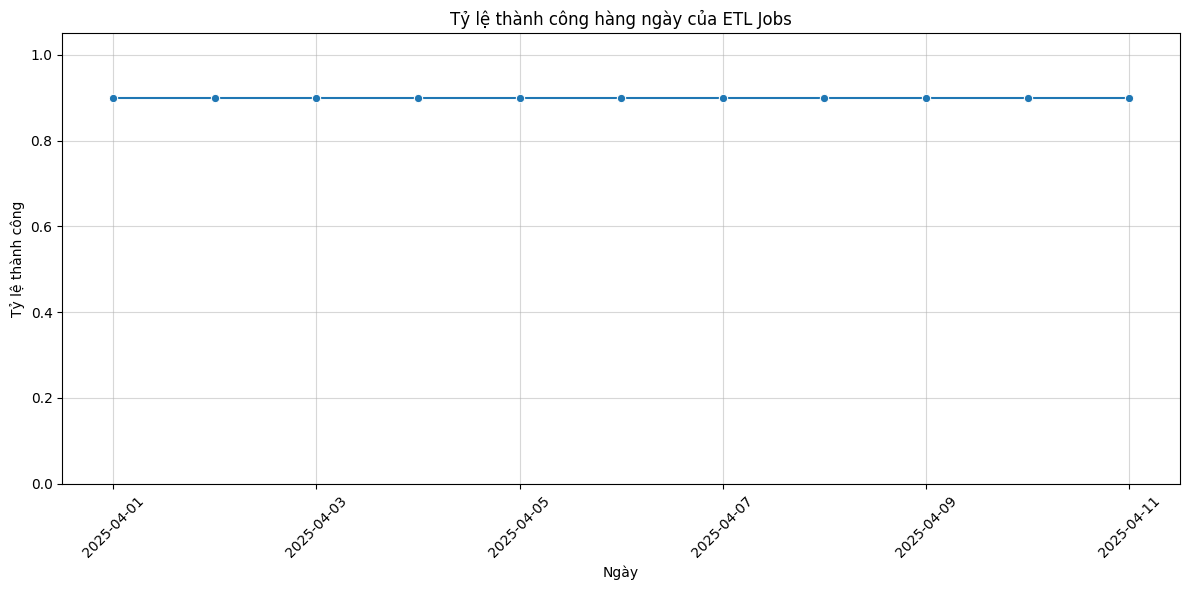

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv("bai_tap_8_etl_job_success_rate.csv")

# Chuyển cột 'date' sang kiểu datetime
df['date'] = pd.to_datetime(df['date'])

# Lọc ra các job thành công
successful_jobs_df = df[df['job_result'] == 'success']

# Đếm số lượng job thành công theo ngày
successful_jobs_count = successful_jobs_df.groupby('date').size().reset_index(name='successful_jobs')

# Đếm tổng số lượng job theo ngày
total_jobs_count = df.groupby('date').size().reset_index(name='total_jobs')

# Merge hai DataFrame để tính tỷ lệ thành công
daily_success = pd.merge(total_jobs_count, successful_jobs_count, on='date')
daily_success['success_rate'] = daily_success['successful_jobs'] / daily_success['total_jobs']

# Vẽ biểu đồ lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='success_rate', data=daily_success, marker='o')
plt.title("Tỷ lệ thành công hàng ngày của ETL Jobs")
plt.xlabel("Ngày")
plt.ylabel("Tỷ lệ thành công")
plt.grid(True, alpha=0.5)
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bài 9: Phân tích dung lượng lưu trữ theo phân vùng S3

**Mô tả:**  
Mỗi phân vùng (`partition_path`) ghi nhận `storage_gb`. So sánh dung lượng để phát hiện phân vùng bất thường.

**Mục tiêu:**  
Tối ưu lưu trữ, cảnh báo phân vùng sai lệch.

**Biểu đồ gợi ý:**  
`barplot` (có thể dùng `horizontal` nếu tên dài)

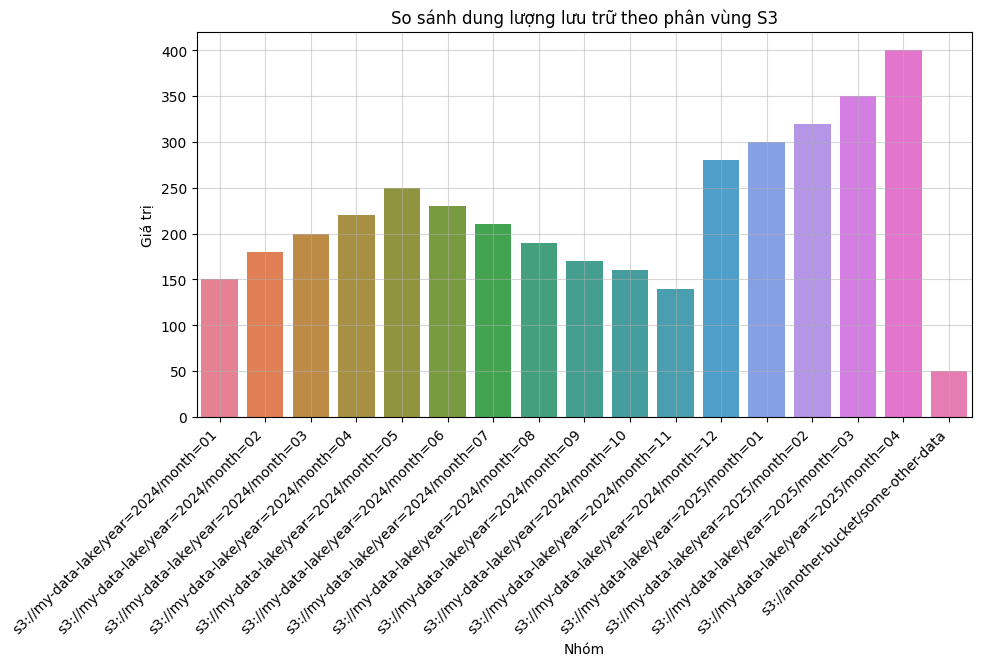

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv("bai_tap_9_s3_storage_by_partition.csv")
df.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='partition_path', y='storage_gb', hue='partition_path', data=df)
plt.title("So sánh dung lượng lưu trữ theo phân vùng S3")
plt.xlabel("Nhóm")
plt.ylabel("Giá trị")
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.5)
plt.show()

### Bài 10: Tỷ lệ phân bố loại dữ liệu (data_type) trong schema

**Mô tả:**  
Một bảng có nhiều field, mỗi field thuộc loại `int`, `float`, `string`, `timestamp`,...

**Mục tiêu:**  
Phân tích cấu trúc schema – nghiêng về số, text hay thời gian?

**Biểu đồ gợi ý:**  
`pie chart` hoặc `countplot`

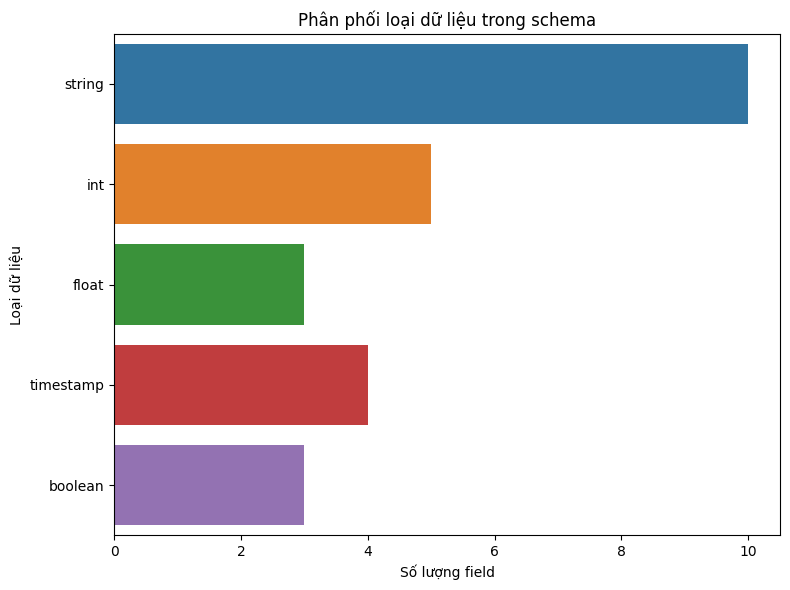

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu từ file CSV
df = pd.read_csv("bai_tap_10_data_type_distribution.csv")

# Vẽ biểu đồ countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='data_type', hue='data_type', legend=False)
plt.title("Phân phối loại dữ liệu trong schema")
plt.xlabel("Số lượng field")
plt.ylabel("Loại dữ liệu")
plt.tight_layout()
plt.show()